In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
plt.rcdefaults()

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions#################

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import statistics as st
from IPython.display import display, HTML

In [3]:
data= pd.read_csv('output.csv')

data

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked 1,Embarked 2,Embarked 3,Embarked 4,Kind1,Kind2,Kind3,Lonliness,Rel
0,0,3,1.0,1.0,22.0,1,0,7.2500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,1,1,2.0,0.0,38.0,1,0,71.2833,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2,1,3,2.0,0.0,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1,1,2.0,0.0,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4,0,3,1.0,1.0,35.0,0,0,8.0500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,3.0,1.0,27.0,0,0,13.0000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
887,1,1,2.0,0.0,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
888,0,3,2.0,0.0,23.0,1,2,23.4500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3
889,1,1,1.0,1.0,26.0,0,0,30.0000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [4]:
X= data.iloc[:,1:16]
Y= data.iloc[:,0]

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)


### Logistic Regression

Train score is :0.824438202247191
Test score is :0.8659217877094972
The Confusion Matrix is :[[109  10]
 [ 14  46]]


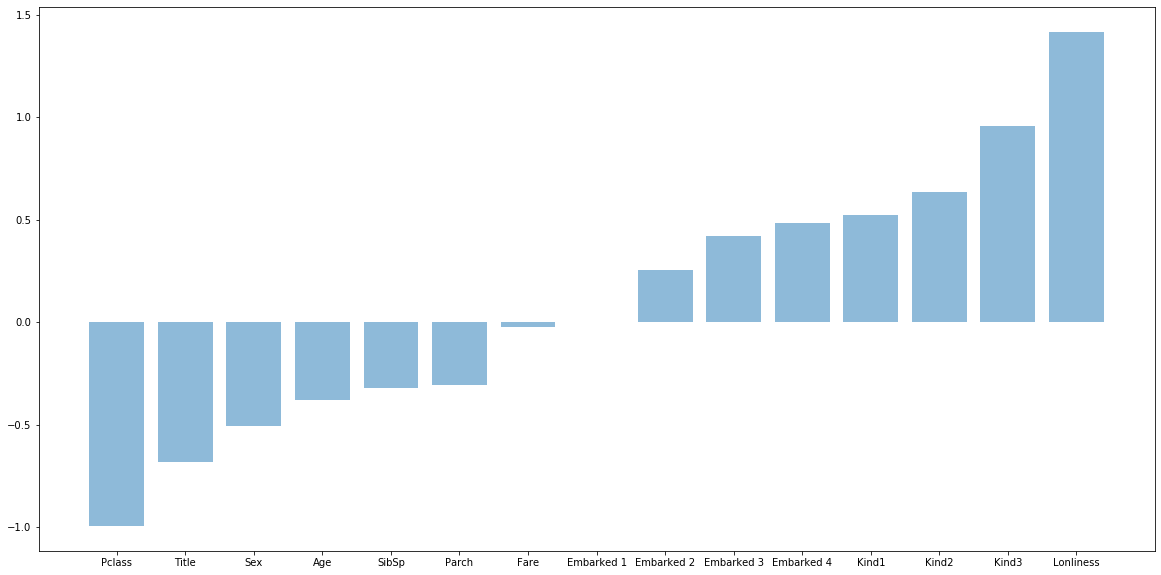

In [5]:
lgr = LogisticRegression(max_iter=10000,solver='liblinear')
lgr.fit(x_train, y_train)
y_pred = lgr.predict(x_test)

cs = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lgr.coef_))], axis = 1)







name=cs.iloc[:,0]
coef=cs.iloc[:,1].sort_values(axis=0)
y_pos = np.arange(len(name))

plt.figure(figsize=(20,10))
plt.bar(y_pos,coef, align='center', alpha=0.5)
plt.xticks(y_pos, name)

print('Train score is :'+str(lgr.score(x_train, y_train)))
print('Test score is :'+str(lgr.score(x_test, y_test)))
print('The Confusion Matrix is :'+str(confusion_matrix(y_test, y_pred)))

### KNN

Test score for l1_norm is :0.7932960893854749
Train score for l1_norm is :0.8637640449438202
	
Test score for l2_norm is :0.7150837988826816
Train score for l2_norm is :0.8455056179775281
	
Test score for l3_norm is :0.7039106145251397
Train score for l3_norm is :0.8441011235955056
	


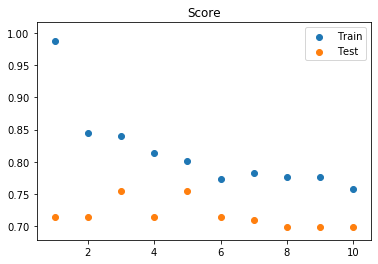

Max_score is for k = 3
The Confusion Matrix is :[[91 20]
 [24 44]]


In [12]:
KNN1 = KNeighborsClassifier(n_neighbors=2, p = 1)
KNN1.fit(x_train, y_train)
y_pred1 = KNN1.predict(x_test)
print('Test score for l1_norm is :'+str(KNN1.score(x_test, y_test)))
print('Train score for l1_norm is :'+str(KNN1.score(x_train, y_train)))
print('\t')

KNN2= KNeighborsClassifier(n_neighbors=2, p = 2)
KNN2.fit(x_train, y_train)
y_pred2 = KNN2.predict(x_test)
print('Test score for l2_norm is :'+str(KNN2.score(x_test, y_test)))
print('Train score for l2_norm is :'+str(KNN2.score(x_train, y_train)))
print('\t')

KNN3 = KNeighborsClassifier(n_neighbors=2, p = 3)
KNN3.fit(x_train, y_train)
y_pred3 = KNN3.predict(x_test)
print('Test score for l3_norm is :'+str(KNN3.score(x_test, y_test)))
print('Train score for l3_norm is :'+str(KNN3.score(x_train, y_train)))
print('\t')


train_score = np.zeros(10)
test_score = np.zeros(10)

for k in range(10):
    
    KNN = KNeighborsClassifier(n_neighbors=k+1, p = 2)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    train_score[k]=KNN.score(x_train, y_train)
    test_score[k] =KNN.score(x_test, y_test)


plt.scatter(range(1,11),train_score)
plt.scatter(range(1,11),test_score)
plt.legend( ('Train', 'Test'))
plt.title('Score')
plt.show()

max_score =np.hstack(np.where(test_score == np.amax(test_score)))

print('Max_score is for k = '+str( max_score[0]+1))

KNN = KNeighborsClassifier(n_neighbors=max_score[0]+1, p = 2)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)



print('The Confusion Matrix is :'+str(confusion_matrix(y_test, y_pred)))

### SVM

In [41]:
SVMl = SVC( kernel='linear')
SVMl.fit(x_train, y_train)
yl_pred = SVMl.predict(x_test)


print("Test score for linear kernel is ="+str(SVMl.score(x_test, y_test)))
print("Train score for linear kernel is ="+str(SVMl.score(x_train, y_train)))
print("The F1-Score for linear kernel is ="+str(f1_score(y_test, yl_pred, average='binary')))
print('\t')



Test score for linear kernel is =0.8435754189944135
Train score for linear kernel is =0.8103932584269663
The F1-Score for linear kernel is =0.7971014492753623
	


In [ ]:
SVMp = SVC( kernel='poly', C=10,gamma='auto')
SVMp.fit(x_train, y_train)
yp_pred = SVMp.predict(x_test)


print("Test score for poly kernel is ="+str(SVMp.score(x_test, y_test)))
print("Train score for poly kernel is ="+str(SVMp.score(x_train, y_train)))
print("The F1-Score for poly kernel is ="+str(f1_score(y_test, yp_pred, average='binary')))






In [9]:
SVMr = SVC( kernel='rbf', C=10,gamma='auto')
SVMr.fit(x_train, y_train)
yr_pred = SVMr.predict(x_test)


print("Test score for rbf kernel is ="+str(SVMr.score(x_test, y_test)))
print("Train score for rbf kernel is ="+str(SVMr.score(x_train, y_train)))
print("The F1-Score for rbf kernel is ="+str(f1_score(y_test, yr_pred, average='binary')))
print('\t')






Test score for poly kernel is =0.776536312849162
Train score for poly kernel is =0.9438202247191011
The F1-Score for poly kernel is =0.696969696969697
	


In [45]:
pca = PCA(n_components=2)
xx_train = pca.fit_transform(x_train)
xx_test = pca.fit_transform(x_test)

SVM = SVC( kernel='rbf', C=100,gamma='auto')
SVM.fit(xx_train, y_train)
y_pred = SVM.predict(xx_test)

print("Test score with PCA and rbf kernel is ="+str(SVM.score(xx_test, y_test)))
print("Train score with PCA and rbf kernel is ="+str(SVM.score(xx_train, y_train)))
print("The F1-Score with PCA and rbf kernel is ="+str(f1_score(y_test, y_pred, average='binary')))

Test score with PCA and rbf kernel is =0.553072625698324
Train score with PCA and rbf kernel is =0.9367977528089888
The F1-Score with PCA and rbf kernel is =0.3548387096774193


<Figure size 432x288 with 0 Axes>

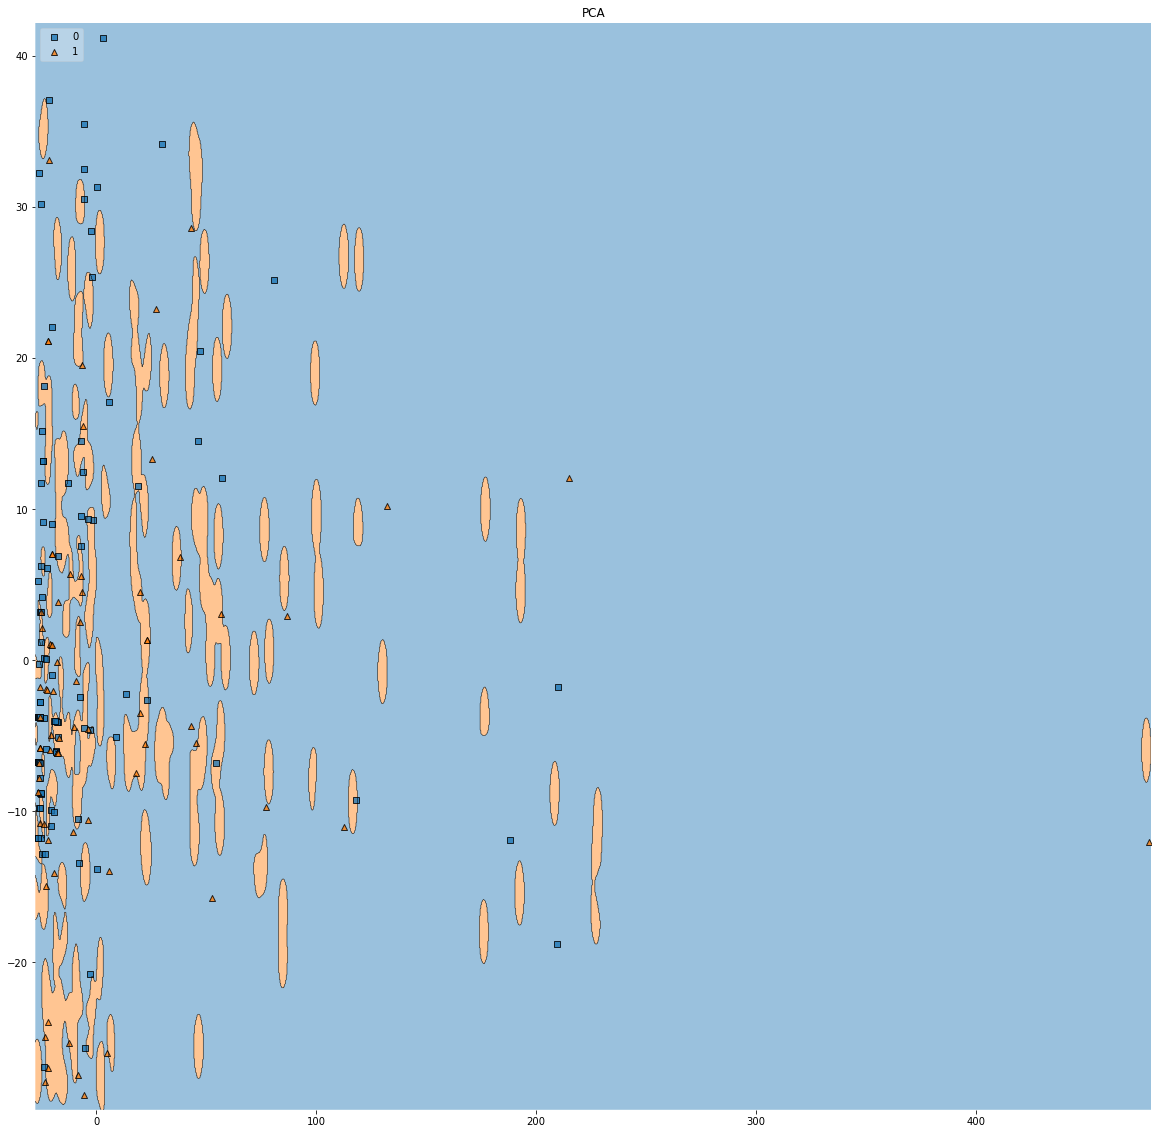

<Figure size 432x288 with 0 Axes>

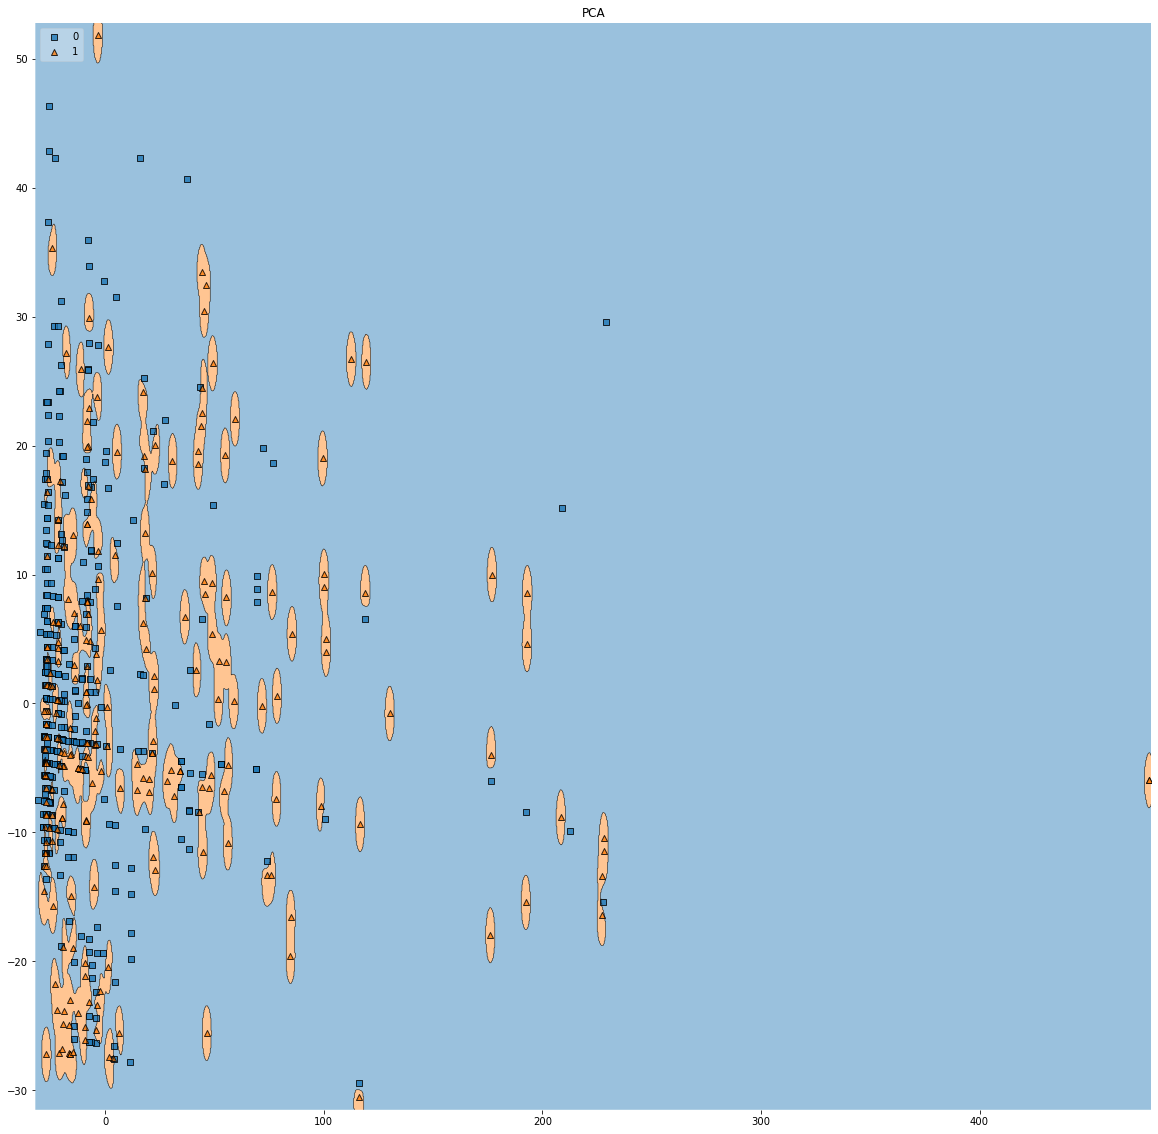

In [46]:
plt.figure(0)
plt.figure(figsize=(20,20))
plot_decision_regions(xx_test, np.array(y_test), clf=SVM, legend=2)

plt.title('PCA')
plt.show()

plt.figure(1)
plt.figure(figsize=(20,20))
plot_decision_regions(xx_train, np.array(y_train), clf=SVM, legend=2)

plt.title('PCA')
plt.show()

### Naive bayes

Test score is =0.8268156424581006
Train score is =0.7935393258426966
The AUC is =0.805166147455867


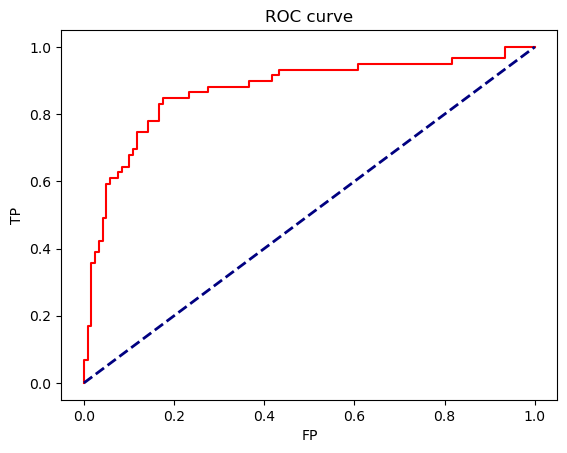

In [49]:


GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred = GNB.predict(x_test)
y_pred_prob = GNB.predict_proba(x_test)

print("Test score is ="+str(GNB.score(x_test, y_test)))
print("Train score is ="+str(GNB.score(x_train, y_train)))
print("The AUC is ="+str(roc_auc_score(y_pred, y_test)))


fpr_GNB, tpr_GNB, thresholds_GNB = roc_curve(y_test, y_pred_prob[: , 1])
plt.plot(fpr_GNB, tpr_GNB, color = 'red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC curve')
plt.xlabel('FP')
plt.ylabel('TP')
plt.show()


### Random Forest

In [10]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)


n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

f_scores=np.zeros([3,len(max_depth)**2+1])

u=0

for i in n_estimators:
    
    for j in max_depth:
        
        RFC = RandomForestClassifier(n_estimators=i, max_depth = j)
        scores = cross_val_score(RFC,x_train, y_train, cv=5)
        
        f_scores[0,u]=scores.mean()
        f_scores[1,u]=i
        f_scores[2,u]=j
        
        u=u+1;



        
        
        
max_score =np.hstack(np.where(f_scores[0,:] == np.amax(f_scores[0,:])))

k=max_score[0]

RFC = RandomForestClassifier(n_estimators=int(f_scores[1,k]), max_depth =int(f_scores[2,k]))
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)

print('Optimal number of trees is = '+str(int(f_scores[1,k])))
print('Optimal number for depth is = '+str(int(f_scores[2,k])))

print("Test score is ="+str(RFC.score(x_test, y_test)))
print("Train score is ="+str(RFC.score(x_train, y_train)))
print("The F1-Score is ="+str(f1_score(y_test, y_pred, average='binary')))

Optimal number of trees is = 31
Optimal number for depth is = 10
Test score is =0.8603351955307262
Train score is =0.9367977528089888
The F1-Score is =0.8031496062992127


### Neural net

In [64]:


learning_rates = [0.001,0.01, 0.1, 1]
alphas = [0.001,0.01,0.1, 1]





f_scores=np.zeros([3,16])

u=0

for i in range(4):
    
    for j in range(4):
        
        NN = MLPClassifier(hidden_layer_sizes=(20,10), activation='relu',solver='adam', batch_size=32,
                           learning_rate_init=learning_rates[i],alpha=alphas[j],max_iter=500)
        
        scores = cross_val_score(NN,x_train, y_train, cv=3)
        
        f_scores[0,u]=scores.mean()
        f_scores[1,u]=learning_rates[i]
        f_scores[2,u]=alphas[j]
        
        u=u+1;
        

max_score =np.hstack(np.where(f_scores[0,:] == np.amax(f_scores[0,:])))

k=max_score[0]        

NN = MLPClassifier(hidden_layer_sizes=(20,10), activation='relu',solver='adam', batch_size=32,
                           learning_rate_init=f_scores[1,k],alpha=f_scores[2,k],max_iter=500)


NN.fit(x_train,y_train)
y_pred =NN.predict(x_test)


print('Optimal number for learning_rate is = '+str(f_scores[1,k]))
print('Optimal number for alpha is = '+str(f_scores[2,k]))

print("Test score is ="+str(NN.score(x_test, y_test)))
print("Train score is ="+str(NN.score(x_train, y_train)))
print('The Confusion Matrix is :'+str(confusion_matrix(y_test, y_pred)))

Optimal number for learning_rate is = 0.01
Optimal number for alpha is = 0.1
Test score is =0.7653631284916201
Train score is =0.8061797752808989
The Confusion Matrix is :[[82 23]
 [19 55]]


In [63]:


learning_rates = [0.001,0.01, 0.1, 1]
alphas = [0.001,0.01,0.1, 1]





f_scores=np.zeros([3,16])

u=0

for i in range(4):
    
    for j in range(4):
        
        NN = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu',solver='adam', batch_size=32,
                           learning_rate_init=learning_rates[i],alpha=alphas[j],max_iter=1500)
        
        scores = cross_val_score(NN,x_train, y_train, cv=3)
        
        f_scores[0,u]=scores.mean()
        f_scores[1,u]=learning_rates[i]
        f_scores[2,u]=alphas[j]
        
        u=u+1;
        

max_score =np.hstack(np.where(f_scores[0,:] == np.amax(f_scores[0,:])))

k=max_score[0]        

NN = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu',solver='adam', batch_size=32,
                           learning_rate_init=f_scores[1,k],alpha=f_scores[2,k],max_iter=1500)


NN.fit(x_train,y_train)
y_pred =NN.predict(x_test)


print('Optimal number for learning_rate is = '+str(f_scores[1,k]))
print('Optimal number for alpha is = '+str(f_scores[2,k]))

print("Test score is ="+str(NN.score(x_test, y_test)))
print("Train score is ="+str(NN.score(x_train, y_train)))
print('The Confusion Matrix is :'+str(confusion_matrix(y_test, y_pred)))

Optimal number for learning_rate is = 0.001
Optimal number for alpha is = 1.0
Test score is =0.7932960893854749
Train score is =0.8286516853932584
The Confusion Matrix is :[[98  7]
 [30 44]]


### BONUS

In [50]:
data= pd.read_csv('BONUS.csv')
X= data.iloc[:,1:9]
Y= data.iloc[:,0]

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

data

,Survived,Pclass,Title,Sex,Age,Kind1,Kind2,Kind3,Lonliness,Rel
0,0,3,1.0,1.0,22.0,0.0,1.0,0.0,1.0,1
1,1,1,2.0,0.0,38.0,0.0,0.0,1.0,1.0,1
2,1,3,2.0,0.0,26.0,0.0,0.0,1.0,0.0,0
3,1,1,2.0,0.0,35.0,0.0,0.0,1.0,1.0,1
4,0,3,1.0,1.0,35.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,3.0,1.0,27.0,0.0,1.0,0.0,0.0,0
887,1,1,2.0,0.0,19.0,0.0,0.0,1.0,0.0,0
888,0,3,2.0,0.0,23.0,0.0,0.0,1.0,1.0,3
889,1,1,1.0,1.0,26.0,0.0,1.0,0.0,0.0,0


In [81]:




n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_depths = np.linspace(1, 32, 32, endpoint=True)





f_scores=np.zeros([3,len(max_depths)*len(n_estimators)+1])

u=0

for i in n_estimators:
    
    for j in range(len(max_depths)):
        
        
        
        
        RFC = RandomForestClassifier(n_estimators=i, max_depth = max_depths[j])
        scores = cross_val_score(RFC,x_train, y_train, cv=5)
        
        f_scores[0,u]=scores.mean()
        f_scores[1,u]=i
        f_scores[2,u]=max_depths[j]

        u=u+1;



        
        
        





max_score =np.hstack(np.where(f_scores[0,:] == np.amax(f_scores[0,:])))

k=max_score[0]








RFC = RandomForestClassifier(n_estimators=int(f_scores[1,k]), max_depth =int(f_scores[2,k]))
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)



print("Test score is ="+str(RFC.score(x_test, y_test)))
print("Train score is ="+str(RFC.score(x_train, y_train)))
print("The F1-Score is ="+str(f1_score(y_test, y_pred, average='binary')))
print('The Confusion Matrix is :'+str(confusion_matrix(y_test, y_pred)))
print("The Accuracy is ="+str(accuracy_score(y_test, y_pred)))
print("The Log Loss is ="+str(log_loss(y_test, y_pred)))
print("The MAE is ="+str(mean_absolute_error(y_test, y_pred)))

Test score is =0.9106145251396648
Train score is =0.797752808988764
The F1-Score is =0.8688524590163934
The Confusion Matrix is :[[110   9]
 [  7  53]]
The Accuracy is =0.9106145251396648
The Log Loss is =3.0873051323767755
The MAE is =0.0893854748603352


C:\Users\ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [450]:

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.1)

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_depths = np.linspace(1, 32, 32, endpoint=True)

f_scores=np.zeros([3,len(max_depths)*len(n_estimators)+1])

u=0

for i in n_estimators:
    
    for j in range(len(max_depths)):
        
        
        
        
        RFC = RandomForestClassifier(n_estimators=i, max_depth = max_depths[j])
        scores = cross_val_score(RFC,x_train, y_train, cv=5)
        
        f_scores[0,u]=scores.mean()
        f_scores[1,u]=i
        f_scores[2,u]=max_depths[j]

        u=u+1;



        
        
        
max_score =np.hstack(np.where(f_scores[0,:] == np.amax(f_scores[0,:])))

k=max_score[0]



RFC = RandomForestClassifier(n_estimators=int(f_scores[1,k]), max_depth =int(f_scores[2,k]))
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)



print("Test score is ="+str(RFC.score(x_test, y_test)))
print("Train score is ="+str(RFC.score(x_train, y_train)))
print("The F1-Score is ="+str(f1_score(y_test, y_pred, average='binary')))
print('The Confusion Matrix is :'+str(confusion_matrix(y_test, y_pred)))
print("The Accuracy is ="+str(accuracy_score(y_test, y_pred)))
print("The Log Loss is ="+str(log_loss(y_test, y_pred)))
print("The MAE is ="+str(mean_absolute_error(y_test, y_pred)))





C:\Users\ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Test score is =0.9333333333333333
Train score is =0.8114856429463171
The F1-Score is =0.9032258064516129
The Confusion Matrix is :[[56  2]
 [ 4 28]]
The Accuracy is =0.9333333333333333
The Log Loss is =2.3026028618258283
The MAE is =0.06666666666666667
